In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score

In [6]:
df = pd.read_csv("D:/Kaggle Dataset/us-accidents/US_Accidents_June20.csv",index_col='ID',parse_dates=['Start_Time','End_Time'])

In [7]:
from datetime import datetime, date

In [8]:
# adding time variables

df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Day'] = df['Start_Time'].dt.day
df['Impact'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60
df["YMD"] = df["Start_Time"].dt.date

In [9]:
numerical_features = ['Start_Lat','Start_Lng','Distance(mi)','Temperature(F)',
                     'Humidity(%)', 'Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']


binary_features = ['Amenity', 'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                   'Station','Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop','Sunrise_Sunset']

categorical_features = ['Street', 'Side', 'City', 'County', 'State','Country', 'Timezone','Weather_Condition',
                       'Month', 'Year', 'Hour', 'Weekday', 'Day']

In [10]:
# transform the categorical variables into binary variables

df.loc[df["Sunrise_Sunset"] == "Day","Sunrise_Sunset"] = 1
df.loc[df["Sunrise_Sunset"] == "Night","Sunrise_Sunset"] = 0

In [11]:
MA_df = df[df["State"] == "MA"]

In [191]:
sev_count = df.groupby("State")["Severity"].value_counts()

In [192]:
sev_count.unstack()

Severity,1,2,3,4
State,,,,
AL,133.0,30002.0,13890.0,600.0
AR,11.0,1011.0,488.0,502.0
AZ,6705.0,55089.0,13178.0,3612.0
CA,5801.0,576742.0,225820.0,8462.0
CO,519.0,25516.0,19888.0,3808.0
CT,22.0,12002.0,11632.0,2245.0
DC,43.0,2991.0,1099.0,687.0
DE,10.0,4288.0,629.0,812.0
FL,3014.0,165506.0,80563.0,8919.0


# Time Series

In [34]:
df1 = MA_df.copy()
df1.ffill(inplace = True)
df1.bfill(inplace = True)

In [35]:
daily_group = df1.groupby("YMD")

In [36]:
daily_accident_count = daily_group["Severity"].count()
daily_severity_sum = daily_group["Severity"].sum()
daily_temp_mean = daily_group["Temperature(F)"].mean()
daily_hmd = daily_group['Humidity(%)'].mean()
daily_pres = daily_group['Pressure(in)'].mean()
daily_vis = daily_group['Visibility(mi)'].mean()
daily_wind = daily_group['Wind_Speed(mph)'].mean()
daily_sun = daily_group["Sunrise_Sunset"].sum()
# daily_twi = daily_group["Civil_Twilight"].sum()
# daily_nau = daily_group["Nautical_Twilight"].sum()
# daily_ast = daily_group["Astronomical_Twilight"].sum()

In [37]:
daily_data = pd.DataFrame({
    "Num" : daily_accident_count,
    "Severity" : daily_severity_sum,
    "Temp" : daily_temp_mean,
    "Humidity" : daily_hmd,
    "Pressure" : daily_pres,
    "Visibility" : daily_vis,
    "Wind_Speed" : daily_wind,
    "Sun" : daily_sun
#    "Twi" : daily_twi,
#    "Nau" : daily_nau,
#    "Astro" : daily_ast
})

In [38]:
cols = ["Num","Severity","Temp","Humidity","Pressure","Visibility","Wind_Speed","Sun"]

In [39]:
daily_data.head(10)

,Num,Severity,Temp,Humidity,Pressure,Visibility,Wind_Speed,Sun
YMD,,,,,,,,
2016-03-23,2,4,44.100000,68.000000,29.880000,10.000000,15.000000,0
2016-03-24,6,12,37.033333,51.833333,30.246667,10.000000,15.716667,3
2016-03-25,4,9,44.750000,86.750000,29.810000,6.000000,10.075000,4
2016-03-28,7,15,41.114286,88.000000,29.791429,6.285714,8.400000,7
2016-03-29,8,16,42.212500,59.125000,29.666250,9.250000,19.012500,8
2016-03-30,4,8,39.700000,41.750000,30.292500,10.000000,9.800000,4
2016-03-31,4,8,60.000000,49.750000,29.937500,10.000000,23.325000,3
2016-04-01,1,2,70.000000,41.000000,29.630000,10.000000,20.700000,1
2016-04-02,1,2,48.000000,41.000000,29.600000,10.000000,6.900000,0


In [40]:
def stand_trans(x):
    x = x-min(x)
    x /= max(x)
    return x

In [41]:
# the proportion of the number of accidents happened at daytime.

# daily_data["Num"] = daily_data["Num"] / max(daily_data["Num"])
daily_data["Visibility"] /= 10

daily_data["Wind_Speed"] = stand_trans(daily_data["Wind_Speed"])
daily_data["Pressure"] = stand_trans(daily_data["Pressure"])
daily_data["Temp"] = stand_trans(daily_data["Temp"])
daily_data["Humidity"] /= 100

daily_data["Sun"] = daily_data["Sun"] / daily_data["Num"]


In [42]:
daily_data.head(10)

,Num,Severity,Temp,Humidity,Pressure,Visibility,Wind_Speed,Sun
YMD,,,,,,,,
2016-03-23,2,4,0.478889,0.680000,0.644682,1.000000,0.514854,0.000000
2016-03-24,6,12,0.400370,0.518333,0.789702,1.000000,0.539452,0.500000
2016-03-25,4,9,0.486111,0.867500,0.616996,0.600000,0.345810,1.000000
2016-03-28,7,15,0.445714,0.880000,0.609651,0.628571,0.288318,1.000000
2016-03-29,8,16,0.457917,0.591250,0.560142,0.925000,0.652577,1.000000
2016-03-30,4,8,0.430000,0.417500,0.807830,1.000000,0.336371,1.000000
2016-03-31,4,8,0.655556,0.497500,0.667424,1.000000,0.800598,0.750000
2016-04-01,1,2,0.766667,0.410000,0.545804,1.000000,0.710498,1.000000
2016-04-02,1,2,0.522222,0.410000,0.533939,1.000000,0.236833,0.000000


In [43]:
daily_data.corr()

,Num,Severity,Temp,Humidity,Pressure,Visibility,Wind_Speed,Sun
Num,1.000000,0.995481,-0.120570,0.180181,-0.050016,-0.175559,-0.043916,-0.098964
Severity,0.995481,1.000000,-0.109089,0.177315,-0.051368,-0.175607,-0.037413,-0.084594
Temp,-0.120570,-0.109089,1.000000,0.051345,-0.171937,0.144500,-0.146946,0.451497
Humidity,0.180181,0.177315,0.051345,1.000000,-0.212569,-0.627188,-0.202350,-0.116362
Pressure,-0.050016,-0.051368,-0.171937,-0.212569,1.000000,0.213271,-0.227533,-0.050620
Visibility,-0.175559,-0.175607,0.144500,-0.627188,0.213271,1.000000,-0.004740,0.088277
Wind_Speed,-0.043916,-0.037413,-0.146946,-0.202350,-0.227533,-0.004740,1.000000,0.060213
Sun,-0.098964,-0.084594,0.451497,-0.116362,-0.050620,0.088277,0.060213,1.000000


In [24]:
daily_data.head(10)

,Num,Severity,Temp,Humidity,Pressure,Visibility,Wind_Speed,Sun
YMD,,,,,,,,
2016-03-23,-1.304674,-1.314195,-0.484305,0.164678,-0.338417,0.536402,1.384506,-1.374094
2016-03-24,-1.091878,-1.137963,-0.872065,-0.792158,1.007235,0.536402,1.566713,-1.173995
2016-03-25,-1.198276,-1.204050,-0.448639,1.274411,-0.595315,-1.487223,0.132367,-1.107295
2016-03-28,-1.038679,-1.071876,-0.648136,1.348393,-0.663471,-1.342679,-0.293487,-0.907196
2016-03-29,-0.985480,-1.049847,-0.587875,-0.360596,-1.122872,0.156972,2.404650,-0.840497
2016-03-30,-1.198276,-1.226079,-0.725740,-1.388948,1.175442,0.536402,0.062451,-1.107295
2016-03-31,-1.198276,-1.226079,0.388155,-0.915462,-0.127394,0.536402,3.501067,-1.173995
2016-04-01,-1.357873,-1.358252,0.936871,-1.433337,-1.255908,0.536402,2.833683,-1.307394
2016-04-02,-1.357873,-1.358252,-0.270306,-1.433337,-1.366007,0.536402,-0.674849,-1.374094


In [23]:
daily_data.corr()

,Num,Severity,Temp,Humidity,Pressure,Visibility,Wind_Speed,Sun
Num,1.000000,0.995481,-0.120570,0.180181,-0.050016,-0.175559,-0.043916,0.923649
Severity,0.995481,1.000000,-0.109089,0.177315,-0.051368,-0.175607,-0.037413,0.928417
Temp,-0.120570,-0.109089,1.000000,0.051345,-0.171937,0.144500,-0.146946,0.079863
Humidity,0.180181,0.177315,0.051345,1.000000,-0.212569,-0.627188,-0.202350,0.153688
Pressure,-0.050016,-0.051368,-0.171937,-0.212569,1.000000,0.213271,-0.227533,-0.072676
Visibility,-0.175559,-0.175607,0.144500,-0.627188,0.213271,1.000000,-0.004740,-0.140949
Wind_Speed,-0.043916,-0.037413,-0.146946,-0.202350,-0.227533,-0.004740,1.000000,-0.042283
Sun,0.923649,0.928417,0.079863,0.153688,-0.072676,-0.140949,-0.042283,1.000000


# Linear Model

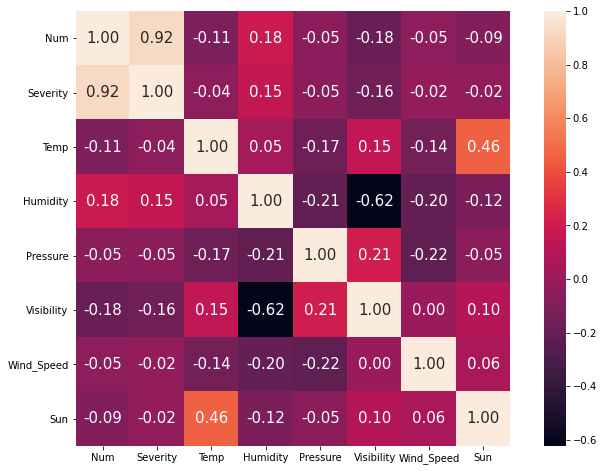

In [153]:
plt.figure(figsize = (12,8))
sns.heatmap(daily_data.corr(),cbar=True, annot=True,square=True,
                 fmt='.2f',annot_kws={'size': 15},
                 yticklabels=cols,xticklabels=cols);

## LDA

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
lda = LinearDiscriminantAnalysis(n_components=3)

In [71]:
lda_model = lda.fit(X, y)

In [66]:
X_r2 = lda_model.transform(X)

In [67]:
X_r2[0:5]

array([[-2.6580407 , -1.13856859, -2.64215883, -0.04405265],
       [-2.88844082,  2.04466084, -1.3671125 ,  9.54770569],
       [-2.90390452,  2.94115351, -0.62026073,  7.28598158],
       [-2.80516451,  2.33066496, -0.24179691, -2.53075149],
       [-2.57827799,  2.40574487, -0.20852909, -0.74613661]])

In [77]:
lda_model.coef_

array([[-3.91445785e-02,  1.67052305e-02, -2.15611296e-02,
        -8.67124154e-01, -4.02145780e-02, -4.06464897e-03],
       [-5.29491474e-02, -1.08425269e-04, -4.66206638e-04,
        -1.38168260e-02, -6.14900443e-04, -5.40765046e-03],
       [ 5.92629262e-02,  3.79833977e-04,  1.53011751e-03,
         6.81050773e-02,  6.81267701e-04,  1.26942888e-02],
       [ 6.34617940e-01, -6.06656929e-03,  2.92769668e-03,
        -4.86767854e-02,  1.93905439e-02,  5.27906605e-03]])

In [82]:
print(np.max(lda_model.coef_,axis=1))
print(np.argmax(lda_model.coef_,axis=1))

[ 1.67052305e-02 -1.08425269e-04  6.81050773e-02  6.34617940e-01]
[1 1 3 0]


In [83]:
lda_model.means_

array([[ 0.19580537, 70.76573417, 50.49202221, 29.01943277,  9.51869298,
         8.40196809],
       [ 0.15890234, 62.49378028, 63.9678727 , 29.69479415,  9.16609337,
         8.07345425],
       [ 0.41372039, 62.29963939, 64.78739625, 29.7564104 ,  9.13258594,
         8.54969969],
       [ 1.72939595, 59.6050853 , 66.01343467, 29.6547961 ,  9.16760026,
         8.39314843]])

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = daily_data[["Temp"]]
y = daily_data["Sun"]

KeyError: "None of [Index(['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',\n       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',\n       'Precipitation(in)'],\n      dtype='object')] are in the [columns]"

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [170]:
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [171]:

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.04054073628983188
0.2619002058161167


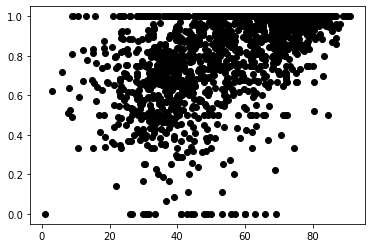

In [177]:
plt.plot(X,y,"ko")

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [179]:
df1 = MA_df.copy()
df1.ffill(inplace = True)
df1.bfill(inplace=True)

In [180]:
# combine Severity into 2 groups
df1.loc[df1["Severity"] <= 2,"Severity"] = 0
df1.loc[df1["Severity"] >= 3,"Severity"] = 1

In [181]:
df1.Severity.value_counts()

0    23635
1    15409
Name: Severity, dtype: int64

In [182]:
n = len(df1.Severity)
df1_type1 = df1[df1.Severity == 1]
n1 = len(df1_type1.Severity)

In [183]:
j = df1_type1.iloc[np.random.randint(n1,size = n-2*n1)]

In [184]:
df1 = df1.append(j)

In [185]:
df1.Severity.value_counts()

1    23635
0    23635
Name: Severity, dtype: int64

In [186]:
y = df1["Severity"].copy()
X = df1[numerical_features + binary_features].copy()

In [187]:
# 1. Import the classes

from sklearn.preprocessing import StandardScaler

# 2. Create an instance of the class
scaler = StandardScaler()

# 3. Use the fit method of the instance
scaler.fit(X[numerical_features])

X.loc[:,numerical_features] = scaler.transform(X[numerical_features])

In [188]:
X.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
ID,,,,,,,,,,,,,,,,,,,,,
A-194264,-0.870878,-3.727067,-0.179429,-0.172354,1.579627,-0.291104,-1.998225,-1.121834,0.552408,False,...,False,False,False,False,False,False,False,False,False,1
A-194268,-0.187284,-0.252644,-0.179429,-0.182753,1.046581,-0.002660,-1.295374,-0.683704,0.552408,False,...,False,False,False,False,True,False,False,True,False,0
A-194269,0.342205,-0.070451,-0.172203,-0.239947,0.901205,0.157586,-1.295374,-0.474164,1.051614,False,...,False,False,False,False,False,False,False,False,False,1
A-194270,0.633056,0.148259,-0.172203,-0.286742,1.046581,0.157586,-1.998225,-0.245575,-0.113201,False,...,False,False,False,False,False,False,False,False,False,1
A-194271,0.761337,0.710102,-0.172203,-0.286742,1.579627,0.029389,-0.943948,-0.245575,0.885212,False,...,False,False,False,False,False,False,False,False,False,1


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [138]:
lor = LogisticRegression(random_state=0)

In [139]:
lor.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [140]:
y_pred=lor.predict(X_test)

In [141]:
accuracy_score(y_test, y_pred)

0.618997249841337

In [142]:
scores = cross_val_score(lor,X,y)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [143]:
np.mean(scores)

0.5969748254707002

# Clustering

In [19]:
df1 = df.copy()
df1.loc[df1["Severity"] <= 2,"Severity"] = 0
df1.loc[df1["Severity"] >= 3,"Severity"] = 1

In [31]:
state_group = df1.groupby("State")
city_group = df1.groupby("City")

In [32]:
state_severe = state_group["Severity"].sum() / state_group["Severity"].count()
city_severe = city_group["Severity"].sum() / city_group["Severity"].count()

In [33]:
state_sun = state_group["Sunrise_Sunset"].sum() / state_group["Sunrise_Sunset"].count()
city_sun = city_group["Sunrise_Sunset"].sum() / city_group["Sunrise_Sunset"].count()

In [23]:
state_info = pd.DataFrame({
    "Severity" : state_severe,
    "at_Daytime" : state_sun
})

In [34]:
city_info = pd.DataFrame({
    "Severity" : city_severe,
    "at_Daytime" : city_sun
})

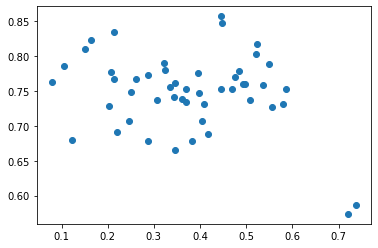

In [36]:
plt.scatter(x="Severity",y="at_Daytime",data=state_info)

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs, make_moons

In [82]:
X = state_info

In [83]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [84]:
y_kmeans = kmeans.predict(X)

In [85]:
centers = kmeans.cluster_centers_
print(centers)

[[0.35581591 0.73575805]
 [0.50711928 0.7750319 ]
 [0.72975023 0.58019233]
 [0.18760417 0.76072253]]


In [86]:
X1 = np.array(X)

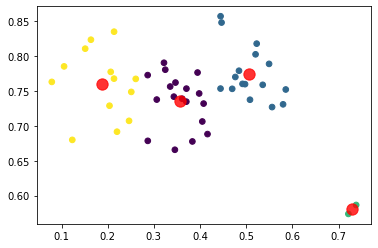

In [87]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=32, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=128, alpha=0.8);

In [81]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
davies_bouldin_score(X1,)

In [79]:
n_clusters = np.arange(1, 12)

models = [KMeans(n,random_state=0).fit(X)
         for n in n_clusters]

metrics = [model.inertia_ for model in models]

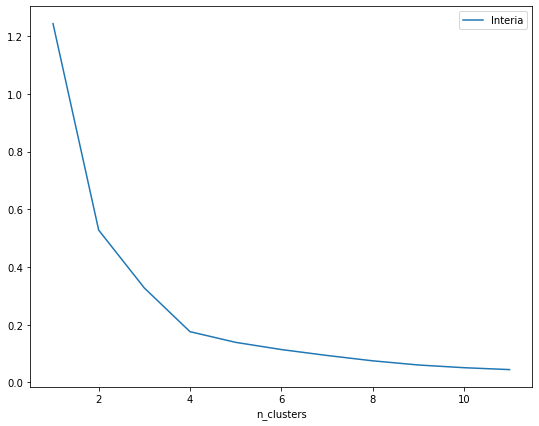

In [80]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(n_clusters, metrics, label='Interia')

plt.legend(loc='best')
plt.xlabel('n_clusters');